# Comprehensive Classification Modeling: Titanic Dataset

This notebook provides a complete end-to-end classification modeling pipeline using the famous Titanic dataset. We'll predict passenger survival using machine learning.

## 🎯 Learning Objectives

1. **Binary Classification Fundamentals**: Understanding the problem type and evaluation metrics
2. **Exploratory Data Analysis**: Uncovering patterns that influence survival
3. **Feature Engineering for Classification**: Creating meaningful features from raw data
4. **Model Selection & Training**: Comparing multiple classification algorithms
5. **Model Evaluation**: Using appropriate metrics for classification problems
6. **Model Interpretation**: Understanding what drives predictions

## 📊 About the Dataset

The Titanic dataset contains information about passengers aboard the RMS Titanic, which sank on April 15, 1912. Our goal is to predict whether a passenger survived (1) or did not survive (0) based on features like:

- **Pclass**: Passenger class (1st, 2nd, 3rd)
- **Sex**: Gender of the passenger
- **Age**: Age of the passenger
- **SibSp**: Number of siblings/spouses aboard
- **Parch**: Number of parents/children aboard
- **Fare**: Ticket fare
- **Embarked**: Port of embarkation

This is a **supervised binary classification** problem where we learn from historical data to predict outcomes.

## 1. Setup and Data Loading

### 📦 Library Imports and Environment Setup

For classification modeling, we need specialized libraries and metrics different from regression:

**Classification-specific tools:**
- **Classification algorithms**: LogisticRegression, SVM, RandomForest, etc.
- **Classification metrics**: Accuracy, Precision, Recall, F1-score, ROC-AUC
- **Evaluation tools**: Confusion matrix, classification report, ROC curves
- **Preprocessing**: Label encoding, feature scaling for classification

**Why these specific imports:**
- Binary classification requires different evaluation than regression
- Class imbalance is common in real-world classification problems
- Interpretability is crucial for understanding feature importance in predictions

In [3]:
# Import essential libraries for classification modeling
# Data manipulation and analysis
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical computations and array operations

# Visualization libraries
import matplotlib.pyplot as plt  # For creating static plots and visualizations
import seaborn as sns            # For statistical data visualization

# Statistical analysis
import warnings                  # To suppress unnecessary warnings
from scipy import stats          # For statistical functions and tests

# Machine Learning libraries from scikit-learn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
# train_test_split: Split data maintaining class distribution
# cross_val_score: Perform stratified k-fold cross-validation for classification
# GridSearchCV: Hyperparameter tuning with cross-validation
# StratifiedKFold: Ensures balanced class distribution in each fold

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
# StandardScaler: Standardize features (important for SVM, KNN, Logistic Regression)
# LabelEncoder: Convert categorical labels to numerical values
# OneHotEncoder: Create binary columns for categorical variables

# Classification algorithms
from sklearn.linear_model import LogisticRegression      # Linear classifier with probability output
from sklearn.tree import DecisionTreeClassifier         # Decision tree for interpretable rules
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
# RandomForest: Ensemble of trees with voting
# GradientBoosting: Sequential ensemble that corrects previous errors
# AdaBoost: Adaptive boosting that focuses on misclassified samples

from sklearn.svm import SVC                             # Support Vector Classifier
from sklearn.neighbors import KNeighborsClassifier      # k-Nearest Neighbors classifier
from sklearn.naive_bayes import GaussianNB              # Naive Bayes for probabilistic classification

# Classification-specific metrics and evaluation tools
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,  # Core classification metrics
    confusion_matrix, classification_report,                   # Detailed evaluation reports
    roc_auc_score, roc_curve, precision_recall_curve,        # ROC and PR curves
    ConfusionMatrixDisplay                                     # Visualization of confusion matrix
)

# Advanced gradient boosting libraries (with robust error handling)
xgb_available = False
lgb_available = False

print("🔧 Checking advanced ML libraries availability...")

# XGBoost with comprehensive error handling
try:
    import xgboost as xgb
    xgb_available = True
    print("✅ XGBoost imported successfully - enables powerful gradient boosting for classification")
except ImportError as e:
    print("⚠️  XGBoost not available. Install with: pip install xgboost")
    print(f"   Import error: {str(e)}")
except Exception as e:
    print(f"⚠️  XGBoost import failed due to: {str(e)}")
    print("   This is often due to missing system dependencies or version conflicts")
    print("   The notebook will continue without XGBoost - other models are available")

# LightGBM with comprehensive error handling
try:
    import lightgbm as lgb
    lgb_available = True
    print("✅ LightGBM imported successfully - enables fast gradient boosting for classification")
except ImportError as e:
    print("⚠️  LightGBM not available. Install with: pip install lightgbm")
    print(f"   Import error: {str(e)}")
except Exception as e:
    print(f"⚠️  LightGBM import failed due to: {str(e)}")
    print("   This is often due to missing system dependencies or version conflicts")
    print("   The notebook will continue without LightGBM - other models are available")

# Configure environment settings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

# Set consistent visualization style
plt.style.use('seaborn-v0_8')  # Modern, clean plotting style
sns.set_palette("husl")         # Use attractive color palette

# Configure pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set random seed for reproducibility
np.random.seed(42)

print("\n✅ Core libraries imported successfully!")
print(f"📊 XGBoost available: {xgb_available}")
print(f"📊 LightGBM available: {lgb_available}")

if not xgb_available and not lgb_available:
    print("\n💡 Note: Advanced gradient boosting libraries are not available.")
    print("   The notebook will work perfectly with scikit-learn algorithms:")
    print("   • Logistic Regression, Random Forest, Gradient Boosting")
    print("   • SVM, Decision Trees, Naive Bayes, AdaBoost, KNN")
    print("   These provide excellent classification performance!")

print("\n📚 Libraries loaded for comprehensive classification modeling:")
print("   • Data processing: pandas, numpy")
print("   • Visualization: matplotlib, seaborn")
print("   • ML algorithms: 8+ classification models from scikit-learn")
print("   • Classification metrics: accuracy, precision, recall, F1, ROC-AUC")
print("   • Model evaluation: confusion matrix, ROC curves, classification reports")

🔧 Checking advanced ML libraries availability...
⚠️  XGBoost import failed due to: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/mozocosmas/Desktop/Projects/Refactor/venv/lib/python3.10/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <8E129FE8-EF1C-38EA-A9CF-202782564052> /Users/mozocosmas/Desktop/Projects/Refactor/venv/lib/python3.10/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/l

### 📊 Data Loading and Initial Inspection

Loading the Titanic dataset and performing initial quality checks specific to classification:

**Classification-specific checks:**
- **Class distribution**: Are classes balanced or imbalanced?
- **Target variable**: Binary (0/1) or needs encoding?
- **Feature types**: Which features are categorical vs. numerical?
- **Missing values**: Different strategies needed for classification

Understanding class imbalance early is crucial - it affects model selection, evaluation metrics, and sampling strategies.

In [4]:
# Load the Titanic dataset and perform comprehensive initial analysis
# This dataset is perfect for learning binary classification concepts
df = pd.read_csv('datasets/Titanic-Dataset.csv')

print("🚢 Titanic Dataset loaded successfully!")
print(f"Shape: {df.shape} (passengers × features)")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

# Perform initial data quality checks
print("\n=== DATASET OVERVIEW ====")
print(f"Total passengers: {df.shape[0]:,}")
print(f"Total features: {df.shape[1]} (including target 'Survived')")
print(f"Duplicate rows: {df.duplicated().sum()}")

# Analyze the target variable (Survived) - this is our classification target
target = 'Survived'
print(f"\n=== TARGET VARIABLE ANALYSIS: {target} ====")
survival_counts = df[target].value_counts()
survival_percentages = df[target].value_counts(normalize=True) * 100

print(f"Class distribution:")
print(f"  Did not survive (0): {survival_counts[0]:>3} passengers ({survival_percentages[0]:>5.1f}%)")
print(f"  Survived (1):        {survival_counts[1]:>3} passengers ({survival_percentages[1]:>5.1f}%)")

# Calculate class imbalance ratio
imbalance_ratio = survival_counts[0] / survival_counts[1]
print(f"\n📊 Class Imbalance Analysis:")
print(f"  Imbalance ratio: {imbalance_ratio:.2f}:1 (non-survivors : survivors)")
if imbalance_ratio > 2:
    print(f"  ⚠️  Moderate class imbalance detected - consider sampling techniques")
elif imbalance_ratio > 5:
    print(f"  🔴 Significant class imbalance - definitely need sampling/weighting")
else:
    print(f"  ✅ Balanced classes - standard metrics will work well")

# Display sample of the data
print("\n=== SAMPLE DATA (First 5 Rows) ====")
print("Preview of passenger data and features:")
display(df.head())

# Quick overview of data types
print(f"\n=== DATA TYPE SUMMARY ====")
print(f"Numerical features: {len(df.select_dtypes(include=[np.number]).columns) - 1}")  # -1 for target
print(f"Categorical features: {len(df.select_dtypes(include=['object']).columns)}")
print(f"Target variable type: {df[target].dtype}")

print("\n✅ Initial data loading completed!")
print("Next: We'll explore the relationship between features and survival")

🚢 Titanic Dataset loaded successfully!
Shape: (891, 12) (passengers × features)
Memory usage: 315.03 KB

=== DATASET OVERVIEW ====
Total passengers: 891
Total features: 12 (including target 'Survived')
Duplicate rows: 0

=== TARGET VARIABLE ANALYSIS: Survived ====
Class distribution:
  Did not survive (0): 549 passengers ( 61.6%)
  Survived (1):        342 passengers ( 38.4%)

📊 Class Imbalance Analysis:
  Imbalance ratio: 1.61:1 (non-survivors : survivors)
  ✅ Balanced classes - standard metrics will work well

=== SAMPLE DATA (First 5 Rows) ====
Preview of passenger data and features:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



=== DATA TYPE SUMMARY ====
Numerical features: 6
Categorical features: 5
Target variable type: int64

✅ Initial data loading completed!
Next: We'll explore the relationship between features and survival


## 2. Exploratory Data Analysis

### 🔍 Survival Analysis by Key Features

Understanding the relationship between features and survival is crucial for feature engineering and model interpretation.

**Key relationships to explore:**
- **Gender**: "Women and children first" - was this rule followed?
- **Passenger Class**: Did social status affect survival chances?
- **Age**: Were younger passengers prioritized?
- **Family Size**: Did traveling with family help or hinder survival?

**Why this analysis matters:**
- **Feature Selection**: Strong relationships indicate predictive features
- **Feature Engineering**: Interactions between features may be important
- **Model Interpretation**: Understanding business logic behind predictions
- **Bias Detection**: Identifying potential unfair discrimination in historical data

=== SURVIVAL ANALYSIS BY KEY FEATURES ====


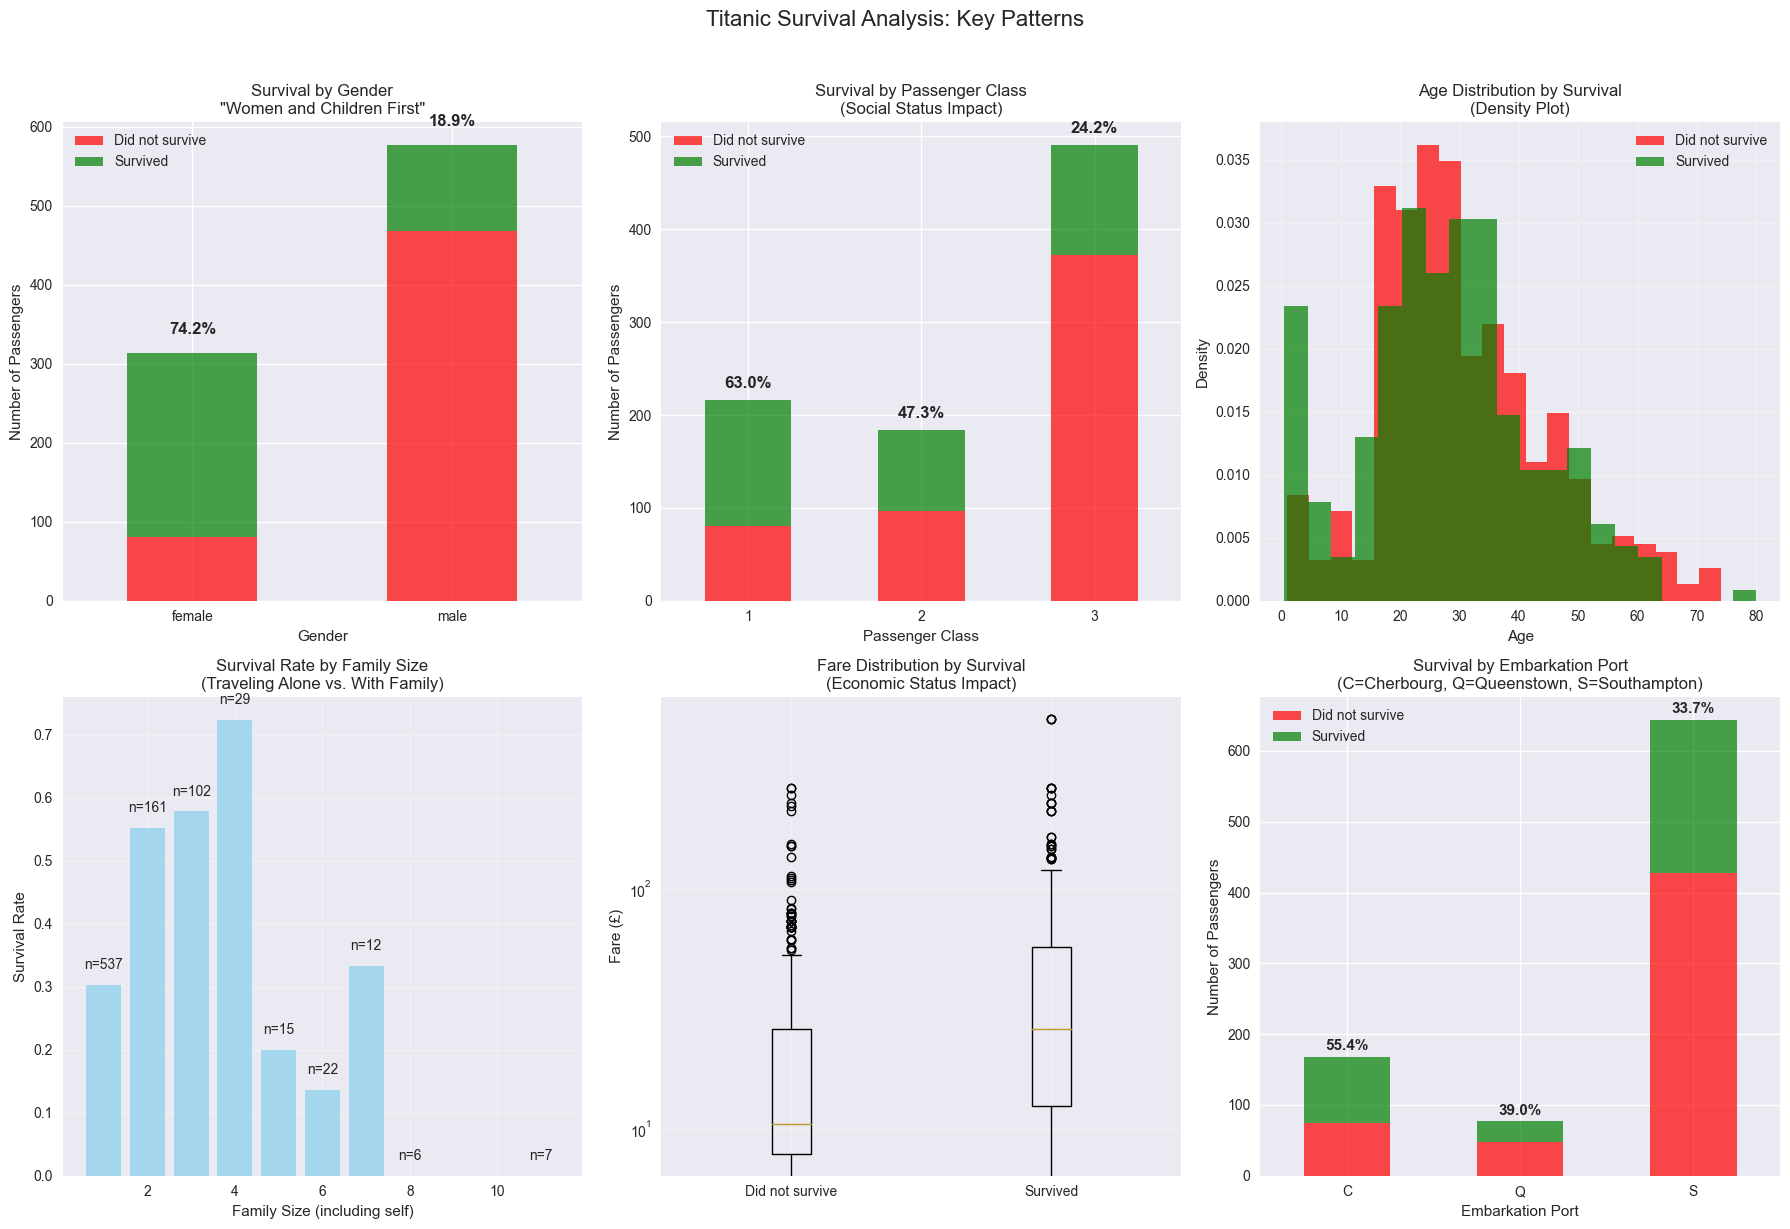


📊 KEY SURVIVAL INSIGHTS:
   👩 Female survival rate: 74.2%
   👨 Male survival rate: 18.9%
   🥇 1st class survival rate: 63.0%
   🥉 3rd class survival rate: 24.2%
   👶 Mean age of survivors: 28.3 years
   💀 Mean age of non-survivors: 30.6 years
   💰 Median fare of survivors: £26.00
   💸 Median fare of non-survivors: £10.50


In [5]:
# Comprehensive survival analysis across key demographic and social features
print("=== SURVIVAL ANALYSIS BY KEY FEATURES ====")

# Create a comprehensive visualization of survival patterns
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Titanic Survival Analysis: Key Patterns', fontsize=16, y=1.02)

# 1. Survival by Gender - the most famous pattern
survival_by_gender = df.groupby('Sex')[target].agg(['count', 'sum', 'mean'])
survival_by_gender.columns = ['Total', 'Survived', 'Survival_Rate']
survival_by_gender['Survival_Percentage'] = survival_by_gender['Survival_Rate'] * 100

# Create stacked bar chart for gender
gender_counts = df.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)
gender_counts.plot(kind='bar', stacked=True, ax=axes[0,0], color=['red', 'green'], alpha=0.7)
axes[0,0].set_title('Survival by Gender\n"Women and Children First"')
axes[0,0].set_xlabel('Gender')
axes[0,0].set_ylabel('Number of Passengers')
axes[0,0].legend(['Did not survive', 'Survived'])
axes[0,0].tick_params(axis='x', rotation=0)

# Add percentage annotations
for i, gender in enumerate(['female', 'male']):
    rate = survival_by_gender.loc[gender, 'Survival_Percentage']
    axes[0,0].text(i, gender_counts.loc[gender].sum() + 20, f'{rate:.1f}%', 
                  ha='center', va='bottom', fontweight='bold', fontsize=12)

# 2. Survival by Passenger Class - social hierarchy impact
class_counts = df.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)
class_counts.plot(kind='bar', stacked=True, ax=axes[0,1], color=['red', 'green'], alpha=0.7)
axes[0,1].set_title('Survival by Passenger Class\n(Social Status Impact)')
axes[0,1].set_xlabel('Passenger Class')
axes[0,1].set_ylabel('Number of Passengers')
axes[0,1].legend(['Did not survive', 'Survived'])
axes[0,1].tick_params(axis='x', rotation=0)

# Add survival rate annotations
survival_by_class = df.groupby('Pclass')[target].mean() * 100
for i, pclass in enumerate([1, 2, 3]):
    rate = survival_by_class.loc[pclass]
    axes[0,1].text(i, class_counts.loc[pclass].sum() + 10, f'{rate:.1f}%', 
                  ha='center', va='bottom', fontweight='bold', fontsize=12)

# 3. Age distribution by survival - were younger people saved?
# Remove missing ages for this analysis
age_data = df.dropna(subset=['Age'])
survived_ages = age_data[age_data[target] == 1]['Age']
died_ages = age_data[age_data[target] == 0]['Age']

axes[0,2].hist(died_ages, bins=20, alpha=0.7, color='red', label='Did not survive', density=True)
axes[0,2].hist(survived_ages, bins=20, alpha=0.7, color='green', label='Survived', density=True)
axes[0,2].set_title('Age Distribution by Survival\n(Density Plot)')
axes[0,2].set_xlabel('Age')
axes[0,2].set_ylabel('Density')
axes[0,2].legend()
axes[0,2].grid(True, alpha=0.3)

# 4. Family size impact (SibSp + Parch)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 for the passenger themselves
family_survival = df.groupby('FamilySize')[target].agg(['count', 'mean'])
family_survival.columns = ['Count', 'Survival_Rate']
family_survival = family_survival[family_survival['Count'] >= 5]  # Only sizes with sufficient data

bars = axes[1,0].bar(family_survival.index, family_survival['Survival_Rate'], 
                    color='skyblue', alpha=0.7)
axes[1,0].set_title('Survival Rate by Family Size\n(Traveling Alone vs. With Family)')
axes[1,0].set_xlabel('Family Size (including self)')
axes[1,0].set_ylabel('Survival Rate')
axes[1,0].grid(True, alpha=0.3)

# Add count annotations
for bar, (size, data) in zip(bars, family_survival.iterrows()):
    axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
                  f'n={int(data["Count"])}', ha='center', va='bottom', fontsize=10)

# 5. Fare distribution - wealth impact
fare_data = df.dropna(subset=['Fare'])
survived_fares = fare_data[fare_data[target] == 1]['Fare']
died_fares = fare_data[fare_data[target] == 0]['Fare']

# Use log scale for better visualization due to fare range
axes[1,1].boxplot([died_fares, survived_fares], labels=['Did not survive', 'Survived'])
axes[1,1].set_title('Fare Distribution by Survival\n(Economic Status Impact)')
axes[1,1].set_ylabel('Fare (£)')
axes[1,1].set_yscale('log')
axes[1,1].grid(True, alpha=0.3)

# 6. Embarkation port analysis
embark_counts = df.groupby(['Embarked', 'Survived']).size().unstack(fill_value=0)
embark_counts.plot(kind='bar', stacked=True, ax=axes[1,2], color=['red', 'green'], alpha=0.7)
axes[1,2].set_title('Survival by Embarkation Port\n(C=Cherbourg, Q=Queenstown, S=Southampton)')
axes[1,2].set_xlabel('Embarkation Port')
axes[1,2].set_ylabel('Number of Passengers')
axes[1,2].legend(['Did not survive', 'Survived'])
axes[1,2].tick_params(axis='x', rotation=0)

# Add survival rate annotations
survival_by_embarked = df.groupby('Embarked')[target].mean() * 100
for i, port in enumerate(['C', 'Q', 'S']):
    if port in survival_by_embarked.index:
        rate = survival_by_embarked.loc[port]
        axes[1,2].text(i, embark_counts.loc[port].sum() + 5, f'{rate:.1f}%', 
                      ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

# Print key statistical insights
print("\n📊 KEY SURVIVAL INSIGHTS:")
print(f"   👩 Female survival rate: {survival_by_gender.loc['female', 'Survival_Percentage']:.1f}%")
print(f"   👨 Male survival rate: {survival_by_gender.loc['male', 'Survival_Percentage']:.1f}%")
print(f"   🥇 1st class survival rate: {survival_by_class.loc[1]:.1f}%")
print(f"   🥉 3rd class survival rate: {survival_by_class.loc[3]:.1f}%")
print(f"   👶 Mean age of survivors: {survived_ages.mean():.1f} years")
print(f"   💀 Mean age of non-survivors: {died_ages.mean():.1f} years")
print(f"   💰 Median fare of survivors: £{survived_fares.median():.2f}")
print(f"   💸 Median fare of non-survivors: £{died_fares.median():.2f}")

### 🔍 Missing Values Analysis for Classification

Missing values in classification require careful handling because they can introduce bias and affect model performance.

**Classification-specific considerations:**
- **Missing patterns**: Are missing values random or systematic?
- **Class relationship**: Do missing values correlate with survival?
- **Imputation strategy**: Different approaches for categorical vs. numerical features
- **Feature creation**: Missing indicators can be predictive features themselves

We'll analyze each feature's missing pattern and choose appropriate handling strategies.

=== MISSING VALUES ANALYSIS FOR CLASSIFICATION ====
📊 MISSING VALUES SUMMARY:
Features with missing values: 3
Total missing values: 866

📋 MISSING VALUES BY FEATURE:
Feature         | Missing | %      | Type     | Unique  | Strategy
Cabin           | 687     | 77.1   | object   | 147     | Create 'Unknown' + Deck extraction
Age             | 177     | 19.9   | float64  | 88      | Median by gender/class
Embarked        | 2       | 0.2    | object   | 3       | Mode (most frequent)

🔍 MISSING VALUES vs SURVIVAL RELATIONSHIP:
   Cabin:
      Survival rate with missing Cabin: 30.0%
      Survival rate without missing Cabin: 66.7%
      Difference: 36.7 percentage points
      ⚠️  Significant difference - missing pattern may be predictive!

   Age:
      Survival rate with missing Age: 29.4%
      Survival rate without missing Age: 40.6%
      Difference: 11.2 percentage points
      ⚠️  Significant difference - missing pattern may be predictive!

   Embarked:
      Survival rate with miss

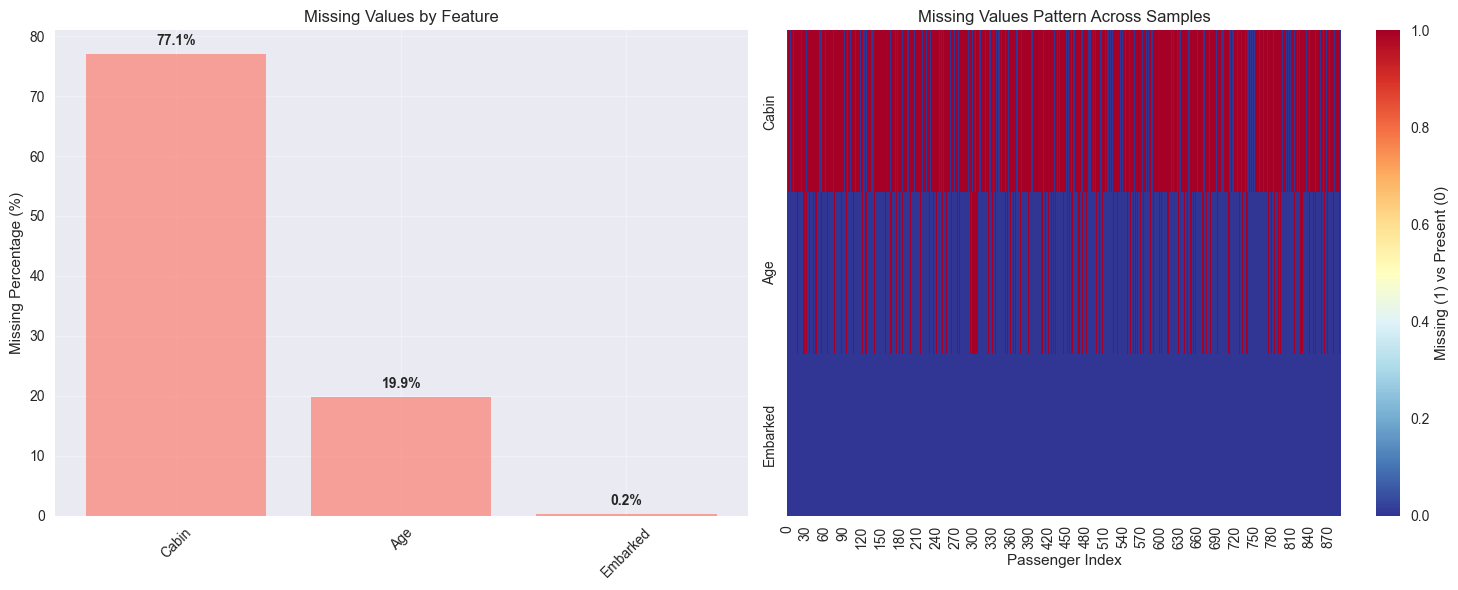


💡 MISSING VALUES STRATEGY:
   • Age: Use median imputation grouped by gender and class (captures demographic patterns)
   • Cabin: Create 'Unknown' category + extract deck information if available
   • Embarked: Use mode imputation (most frequent port)
   • Create missing indicators: Binary features indicating if original value was missing
   • Validate: Check if missing patterns correlate with survival for feature engineering


In [6]:
# Comprehensive missing values analysis for classification context
print("=== MISSING VALUES ANALYSIS FOR CLASSIFICATION ====")

# Create comprehensive missing values report
missing_analysis = pd.DataFrame({
    'Feature': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100,
    'Data_Type': df.dtypes,
    'Unique_Values': [df[col].nunique() for col in df.columns]
})

# Focus on features with missing values
missing_features = missing_analysis[missing_analysis['Missing_Count'] > 0].copy()
missing_features = missing_features.sort_values('Missing_Percentage', ascending=False)

print(f"📊 MISSING VALUES SUMMARY:")
print(f"Features with missing values: {len(missing_features)}")
print(f"Total missing values: {missing_features['Missing_Count'].sum():,}")

if len(missing_features) > 0:
    print(f"\n📋 MISSING VALUES BY FEATURE:")
    print("=" * 85)
    print(f"{'Feature':<15} | {'Missing':<7} | {'%':<6} | {'Type':<8} | {'Unique':<7} | Strategy")
    print("=" * 85)
    
    for _, row in missing_features.iterrows():
        feature = row['Feature']
        missing_count = int(row['Missing_Count'])
        missing_pct = row['Missing_Percentage']
        data_type = str(row['Data_Type'])
        unique_vals = int(row['Unique_Values'])
        
        # Determine strategy based on feature characteristics
        if feature == 'Age':
            strategy = "Median by gender/class"
        elif feature == 'Cabin':
            strategy = "Create 'Unknown' + Deck extraction"
        elif feature == 'Embarked':
            strategy = "Mode (most frequent)"
        elif feature == 'Fare':
            strategy = "Median by class"
        else:
            strategy = "To be determined"
        
        print(f"{feature:<15} | {missing_count:<7} | {missing_pct:<6.1f} | {data_type[:8]:<8} | {unique_vals:<7} | {strategy}")
    
    # Analyze relationship between missing values and survival
    print(f"\n🔍 MISSING VALUES vs SURVIVAL RELATIONSHIP:")
    for feature in missing_features['Feature']:
        if feature != target:  # Don't analyze target against itself
            missing_mask = df[feature].isnull()
            survival_with_missing = df[missing_mask][target].mean() if missing_mask.sum() > 0 else 0
            survival_without_missing = df[~missing_mask][target].mean()
            
            difference = abs(survival_with_missing - survival_without_missing) * 100
            
            print(f"   {feature}:")
            print(f"      Survival rate with missing {feature}: {survival_with_missing*100:.1f}%")
            print(f"      Survival rate without missing {feature}: {survival_without_missing*100:.1f}%")
            print(f"      Difference: {difference:.1f} percentage points")
            
            if difference > 5:
                print(f"      ⚠️  Significant difference - missing pattern may be predictive!")
            print()

    # Visualize missing values pattern
    if len(missing_features) > 0:
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # Missing values bar chart
        axes[0].bar(missing_features['Feature'], missing_features['Missing_Percentage'], 
                   color='salmon', alpha=0.7)
        axes[0].set_title('Missing Values by Feature')
        axes[0].set_ylabel('Missing Percentage (%)')
        axes[0].tick_params(axis='x', rotation=45)
        axes[0].grid(True, alpha=0.3)
        
        # Add percentage labels
        for i, (feature, pct) in enumerate(zip(missing_features['Feature'], missing_features['Missing_Percentage'])):
            axes[0].text(i, pct + 1, f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold')
        
        # Missing values heatmap
        missing_matrix = df[missing_features['Feature']].isnull().astype(int)
        if len(missing_matrix.columns) > 1:
            sns.heatmap(missing_matrix.T, cmap='RdYlBu_r', cbar_kws={'label': 'Missing (1) vs Present (0)'}, ax=axes[1])
            axes[1].set_title('Missing Values Pattern Across Samples')
            axes[1].set_xlabel('Passenger Index')
        else:
            axes[1].text(0.5, 0.5, 'Only one feature\nwith missing values', 
                        transform=axes[1].transAxes, ha='center', va='center')
            axes[1].set_title('Missing Values Pattern')
        
        plt.tight_layout()
        plt.show()

else:
    print("✅ Excellent! No missing values found in the dataset!")

print(f"\n💡 MISSING VALUES STRATEGY:")
print(f"   • Age: Use median imputation grouped by gender and class (captures demographic patterns)")
print(f"   • Cabin: Create 'Unknown' category + extract deck information if available")
print(f"   • Embarked: Use mode imputation (most frequent port)")
print(f"   • Create missing indicators: Binary features indicating if original value was missing")
print(f"   • Validate: Check if missing patterns correlate with survival for feature engineering")

## 3. Feature Engineering for Classification

Feature engineering for classification focuses on creating features that help distinguish between classes (survived vs. didn't survive).

**Classification-specific feature engineering:**

1. **Categorical Encoding**: Converting text categories to numerical representations
2. **Feature Interactions**: Combining features that work together (e.g., Age × Gender)
3. **Binning/Grouping**: Converting continuous variables to categories when relationships are non-linear
4. **Domain Knowledge**: Creating features based on historical context (\"Women and children first\")"

### 🔧 Data Preprocessing and Feature Creation

This section handles missing values and creates new features that can improve classification performance.

**Key preprocessing steps:**
- **Strategic missing value handling**: Different approaches for each feature type
- **Feature creation**: Building new predictive features from existing data
- **Categorical encoding**: Converting text to numbers for machine learning
- **Feature scaling**: Normalizing numerical features for certain algorithms

In [9]:
# Comprehensive feature engineering and preprocessing for classification
# Create a copy of the dataset for feature engineering
df_processed = df.copy()

print("=== FEATURE ENGINEERING FOR CLASSIFICATION ===")

# 1. Handle missing values strategically
print("\n🔧 Step 1: Strategic Missing Value Handling")

# Age: Fill with median grouped by gender and passenger class
# This preserves demographic patterns that affect survival
age_median_by_group = df_processed.groupby(['Sex', 'Pclass'])['Age'].median()
print(f"   Age missing values: {df_processed['Age'].isnull().sum()}")

def fill_age(row):
    if pd.isna(row['Age']):
        return age_median_by_group[(row['Sex'], row['Pclass'])]
    return row['Age']

df_processed['Age'] = df_processed.apply(fill_age, axis=1)
print(f"   ✅ Age filled with median by gender and class")

# Embarked: Fill with mode (most frequent value)
embarked_mode = df_processed['Embarked'].mode()[0]
df_processed['Embarked'].fillna(embarked_mode, inplace=True)
print(f"   ✅ Embarked filled with mode: '{embarked_mode}'")

# Cabin: Create 'Unknown' category and extract deck information
cabin_missing = df_processed['Cabin'].isnull().sum()
df_processed['Cabin_Known'] = df_processed['Cabin'].notna().astype(int)  # Binary: has cabin info or not
df_processed['Deck'] = df_processed['Cabin'].str[0]  # Extract first letter (deck)
df_processed['Deck'].fillna('Unknown', inplace=True)
print(f"   ✅ Cabin: Created binary indicator and extracted deck information")

# Fare: Fill with median by passenger class
fare_median_by_class = df_processed.groupby('Pclass')['Fare'].median()
def fill_fare(row):
    if pd.isna(row['Fare']):
        return fare_median_by_class[row['Pclass']]
    return row['Fare']

df_processed['Fare'] = df_processed.apply(fill_fare, axis=1)
print(f"   ✅ Fare filled with median by passenger class")

print(f"   Total missing values after processing: {df_processed.isnull().sum().sum()}")

print("\n🎯 Step 2: Feature Creation Based on Domain Knowledge")

# Family size (important for survival - traveling alone vs. with family)
df_processed['FamilySize'] = df_processed['SibSp'] + df_processed['Parch'] + 1
df_processed['IsAlone'] = (df_processed['FamilySize'] == 1).astype(int)
print(f"   ✅ Created FamilySize and IsAlone features")

# Age groups (children, adults, elderly - "women and children first" rule)
def categorize_age(age):
    if age < 16:
        return 'Child'
    elif age < 60:
        return 'Adult'
    else:
        return 'Elderly'

df_processed['AgeGroup'] = df_processed['Age'].apply(categorize_age)
print(f"   ✅ Created AgeGroup categories: Child, Adult, Elderly")

# Fare per person (economic status accounting for family size)
df_processed['FarePerPerson'] = df_processed['Fare'] / df_processed['FamilySize']
print(f"   ✅ Created FarePerPerson feature")

# Title extraction from Name (social status indicator)
def extract_title(name):
    if ',' not in name:
        return 'Unknown'
    title = name.split(',')[1].split('.')[0].strip()
    
    # Group rare titles
    if title in ['Mr']:
        return 'Mr'
    elif title in ['Miss', 'Mlle', 'Ms']:
        return 'Miss'
    elif title in ['Mrs', 'Mme']:
        return 'Mrs'
    elif title in ['Master']:
        return 'Master'
    elif title in ['Dr', 'Rev', 'Col', 'Major', 'Capt']:
        return 'Officer'
    elif title in ['Countess', 'Lady', 'Sir', 'Don', 'Dona', 'Jonkheer']:
        return 'Nobility'
    else:
        return 'Other'

df_processed['Title'] = df_processed['Name'].apply(extract_title)
print(f"   ✅ Extracted and grouped titles from passenger names")

# Interaction features (combinations that might be predictive)
df_processed['Gender_Class'] = df_processed['Sex'] + '_' + df_processed['Pclass'].astype(str)
print(f"   ✅ Created Gender_Class interaction feature")

# Display feature engineering summary
print(f"\n📊 FEATURE ENGINEERING SUMMARY:")
print(f"   Original features: {df.shape[1]}")
print(f"   New features created: {df_processed.shape[1] - df.shape[1]}")
print(f"   Total features: {df_processed.shape[1]}")

# Show sample of new features
print(f"\n📋 SAMPLE OF ENGINEERED FEATURES:")
new_features = ['FamilySize', 'IsAlone', 'AgeGroup', 'FarePerPerson', 'Title', 'Deck', 'Cabin_Known', 'Gender_Class']
display(df_processed[new_features + [target]].head(10))

# Analyze the predictive power of new features
print(f"\n🎯 SURVIVAL RATES BY NEW FEATURES:")
for feature in ['IsAlone', 'AgeGroup', 'Title']:
    if feature in df_processed.columns:
        survival_by_feature = df_processed.groupby(feature)[target].agg(['count', 'mean'])
        survival_by_feature.columns = ['Count', 'Survival_Rate']
        survival_by_feature['Survival_Percentage'] = survival_by_feature['Survival_Rate'] * 100
        
        print(f"\n   {feature}:")
        for idx, row in survival_by_feature.iterrows():
            print(f"      {idx}: {row['Survival_Percentage']:.1f}% (n={int(row['Count'])})")

print(f"\n✅ Feature engineering completed successfully!")
print(f"Next: We'll encode categorical variables and prepare for modeling")

=== FEATURE ENGINEERING FOR CLASSIFICATION ===

🔧 Step 1: Strategic Missing Value Handling
   Age missing values: 177
   ✅ Age filled with median by gender and class
   ✅ Embarked filled with mode: 'S'
   ✅ Cabin: Created binary indicator and extracted deck information
   ✅ Fare filled with median by passenger class
   Total missing values after processing: 687

🎯 Step 2: Feature Creation Based on Domain Knowledge
   ✅ Created FamilySize and IsAlone features
   ✅ Created AgeGroup categories: Child, Adult, Elderly
   ✅ Created FarePerPerson feature
   ✅ Extracted and grouped titles from passenger names
   ✅ Created Gender_Class interaction feature

📊 FEATURE ENGINEERING SUMMARY:
   Original features: 13
   New features created: 7
   Total features: 20

📋 SAMPLE OF ENGINEERED FEATURES:


,FamilySize,IsAlone,AgeGroup,FarePerPerson,Title,Deck,Cabin_Known,Gender_Class,Survived
0,2,0,Adult,3.62500,Mr,Unknown,0,male_3,0
1,2,0,Adult,35.64165,Mrs,C,1,female_1,1
2,1,1,Adult,7.92500,Miss,Unknown,0,female_3,1
3,2,0,Adult,26.55000,Mrs,C,1,female_1,1
4,1,1,Adult,8.05000,Mr,Unknown,0,male_3,0
5,1,1,Adult,8.45830,Mr,Unknown,0,male_3,0
6,1,1,Adult,51.86250,Mr,E,1,male_1,0
7,5,0,Child,4.21500,Master,Unknown,0,male_3,0
8,3,0,Adult,3.71110,Mrs,Unknown,0,female_3,1
9,2,0,Child,15.03540,Mrs,Unknown,0,female_2,1



🎯 SURVIVAL RATES BY NEW FEATURES:

   IsAlone:
      0: 50.6% (n=354)
      1: 30.4% (n=537)

   AgeGroup:
      Adult: 36.6% (n=782)
      Child: 59.0% (n=83)
      Elderly: 26.9% (n=26)

   Title:
      Master: 57.5% (n=40)
      Miss: 70.3% (n=185)
      Mr: 15.7% (n=517)
      Mrs: 79.4% (n=126)
      Nobility: 50.0% (n=4)
      Officer: 27.8% (n=18)
      Other: 100.0% (n=1)

✅ Feature engineering completed successfully!
Next: We'll encode categorical variables and prepare for modeling


### 🎯 Data Preparation for Machine Learning

Converting our engineered features into a format suitable for machine learning algorithms.

**Key preparation steps:**
- **Categorical encoding**: Converting text categories to numerical representations
- **Feature selection**: Choosing the most relevant features for modeling
- **Data splitting**: Creating train/test sets with stratified sampling (preserves class distribution)
- **Feature scaling**: Normalizing numerical features for distance-based algorithms

**Why stratified splitting matters:**
In classification, we want both training and test sets to have similar class distributions to ensure fair evaluation.

In [15]:
# Prepare data for machine learning algorithms
print("=== DATA PREPARATION FOR MACHINE LEARNING ===")

# 1. Select features for modeling (exclude non-predictive columns)
print("\n🎯 Step 1: Feature Selection")

exclude_features = ['PassengerId', 'Name', 'Ticket', 'Cabin']
features_to_keep = [col for col in df_processed.columns if col not in exclude_features + [target]]

print(f"   Excluded features: {exclude_features}")
print(f"   Features for modeling: {len(features_to_keep)}")
print(f"   Selected features: {features_to_keep}")

X = df_processed[features_to_keep].copy()
y = df_processed[target].copy()

print(f"   Feature matrix shape: {X.shape}")
print(f"   Target vector shape: {y.shape}")

# 2. Handle categorical variables with encoding
print("\n🔧 Step 2: Categorical Variable Encoding")

categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()

print(f"   Categorical features ({len(categorical_features)}): {categorical_features}")
print(f"   Numerical features ({len(numerical_features)}): {numerical_features}")

# Defensive: If no categorical features, skip get_dummies
if categorical_features:
    X_encoded = pd.get_dummies(X, columns=categorical_features, prefix=categorical_features, drop_first=True)
else:
    X_encoded = X.copy()

print(f"   ✅ Applied one-hot encoding")
print(f"   Features after encoding: {X_encoded.shape[1]} (was {X.shape[1]})")
print(f"   New feature names (first 10): {list(X_encoded.columns[:10])}")

# 3. Split data with stratification (preserves class distribution)
print("\n🎲 Step 3: Train-Test Split with Stratification")

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"   Training set: {X_train.shape[0]} passengers ({X_train.shape[0]/len(X_encoded)*100:.1f}%)")
print(f"   Test set: {X_test.shape[0]} passengers ({X_test.shape[0]/len(X_encoded)*100:.1f}%)")

train_survival_rate = y_train.mean() * 100
test_survival_rate = y_test.mean() * 100
original_survival_rate = y.mean() * 100

print(f"\n   📊 Class Distribution Verification:")
print(f"      Original survival rate: {original_survival_rate:.1f}%")
print(f"      Training survival rate: {train_survival_rate:.1f}%")
print(f"      Test survival rate: {test_survival_rate:.1f}%")
print(f"      ✅ Distribution preserved: {abs(train_survival_rate - test_survival_rate) < 2}")

# 4. Feature scaling for algorithms that need it
print("\n⚖️ Step 4: Feature Scaling")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"   ✅ Applied StandardScaler (mean=0, std=1)")
print(f"   Scaled features shape: {X_train_scaled.shape}")
print(f"   Feature means after scaling (first 5): {X_train_scaled.mean(axis=0)[:5].round(6)}")
print(f"   Feature stds after scaling (first 5): {X_train_scaled.std(axis=0)[:5].round(6)}")

# 5. Display final dataset summary
print(f"\n📊 FINAL DATASET SUMMARY:")
print(f"   Total passengers: {len(X_encoded)}")
print(f"   Features after encoding: {X_encoded.shape[1]}")
print(f"   Training samples: {X_train.shape[0]}")
print(f"   Test samples: {X_test.shape[0]}")
print(f"   Class balance (survived): {original_survival_rate:.1f}%")

print(f"\n📋 SAMPLE OF FINAL ENCODED FEATURES:")
display(pd.DataFrame(X_train_scaled[:5], columns=X_encoded.columns).round(3))

print(f"\n✅ Data preparation completed successfully!")
print(f"Next: We'll train multiple classification models and compare their performance")

=== DATA PREPARATION FOR MACHINE LEARNING ===

🎯 Step 1: Feature Selection
   Excluded features: ['PassengerId', 'Name', 'Ticket', 'Cabin']
   Features for modeling: 15
   Selected features: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'Cabin_Known', 'Deck', 'IsAlone', 'AgeGroup', 'FarePerPerson', 'Title', 'Gender_Class']
   Feature matrix shape: (891, 15)
   Target vector shape: (891,)

🔧 Step 2: Categorical Variable Encoding
   Categorical features (6): ['Sex', 'Embarked', 'Deck', 'AgeGroup', 'Title', 'Gender_Class']
   Numerical features (9): ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'Cabin_Known', 'IsAlone', 'FarePerPerson']
   ✅ Applied one-hot encoding
   Features after encoding: 33 (was 15)
   New feature names (first 10): ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'Cabin_Known', 'IsAlone', 'FarePerPerson', 'Sex_male']

🎲 Step 3: Train-Test Split with Stratification
   Training set: 712 passengers (79.9%)
   Test set

,Pclass,Age,SibSp,Parch,Fare,FamilySize,Cabin_Known,IsAlone,FarePerPerson,Sex_male,Embarked_Q,Embarked_S,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Unknown,AgeGroup_Child,AgeGroup_Elderly,Title_Miss,Title_Mr,Title_Mrs,Title_Nobility,Title_Officer,Title_Other,Gender_Class_female_2,Gender_Class_female_3,Gender_Class_male_1,Gender_Class_male_2,Gender_Class_male_3
0,0.830,-0.322,-0.465,-0.466,0.514,-0.556,-0.538,0.800,0.958,0.742,-0.289,0.612,-0.224,-0.247,-0.195,-0.206,-0.125,-0.075,-0.038,0.538,-0.32,-0.161,-0.504,0.853,-0.421,-0.075,-0.142,0.0,-0.298,-0.441,-0.385,-0.385,1.261
1,-0.371,0.054,-0.465,-0.466,-0.663,-0.556,-0.538,0.800,-0.541,0.742,-0.289,0.612,-0.224,-0.247,-0.195,-0.206,-0.125,-0.075,-0.038,0.538,-0.32,-0.161,-0.504,0.853,-0.421,-0.075,-0.142,0.0,-0.298,-0.441,-0.385,2.596,-0.793
2,-1.571,0.805,-0.465,-0.466,3.955,-0.556,1.857,0.800,5.343,0.742,-0.289,0.612,-0.224,4.045,-0.195,-0.206,-0.125,-0.075,-0.038,-1.857,-0.32,-0.161,-0.504,0.853,-0.421,-0.075,-0.142,0.0,-0.298,-0.441,2.596,-0.385,-0.793
3,0.830,-0.848,-0.465,0.728,-0.468,0.073,-0.538,-1.249,-0.417,-1.347,-0.289,0.612,-0.224,-0.247,-0.195,-0.206,-0.125,-0.075,-0.038,0.538,-0.32,-0.161,-0.504,-1.172,2.378,-0.075,-0.142,0.0,-0.298,2.267,-0.385,-0.385,-0.793
4,-0.371,0.129,0.478,0.728,-0.116,0.703,-0.538,-1.249,-0.309,-1.347,-0.289,0.612,-0.224,-0.247,-0.195,-0.206,-0.125,-0.075,-0.038,0.538,-0.32,-0.161,-0.504,-1.172,2.378,-0.075,-0.142,0.0,3.358,-0.441,-0.385,-0.385,-0.793



✅ Data preparation completed successfully!
Next: We'll train multiple classification models and compare their performance


## 4. Model Selection and Training

We'll train multiple classification algorithms and compare their performance using cross-validation.

**Classification algorithms to test:**

1. **Logistic Regression**: Linear classifier with probability outputs - good baseline
2. **Decision Tree**: Rule-based classifier - highly interpretable 
3. **Random Forest**: Ensemble of trees - reduces overfitting
4. **Gradient Boosting**: Sequential ensemble - often high performance
5. **Support Vector Machine**: Finds optimal decision boundary
6. **K-Nearest Neighbors**: Instance-based learning
7. **Naive Bayes**: Probabilistic classifier assuming feature independence

**Why test multiple models:**
- Different algorithms work better for different data patterns
- Ensemble methods often outperform single models
- Some models are more interpretable than others
- Cross-validation gives us robust performance estimates

=== MODEL SELECTION AND TRAINING ===

🤖 Training 8 classification models:
   • Logistic Regression
   • Decision Tree
   • Random Forest
   • Gradient Boosting
   • SVM
   • KNN
   • Naive Bayes
   • AdaBoost

🔄 Performing 5-fold stratified cross-validation...

Model Performance (Cross-Validation):
Model              | Accuracy | Precision | Recall   | F1-Score

   Training Logistic Regression... ✅
Logistic Regression | 0.827    | 0.812     | 0.722    | 0.762   

   Training Decision Tree... ✅
Decision Tree      | 0.796    | 0.729     | 0.751    | 0.739   

   Training Random Forest... ✅
Random Forest      | 0.822    | 0.780     | 0.747    | 0.763   

   Training Gradient Boosting... ✅
Gradient Boosting  | 0.833    | 0.811     | 0.740    | 0.772   

   Training SVM... ✅
SVM                | 0.829    | 0.833     | 0.696    | 0.757   

   Training KNN... ✅
KNN                | 0.808    | 0.783     | 0.700    | 0.736   

   Training Naive Bayes... ✅
Naive Bayes        | 0.787    | 0.707  

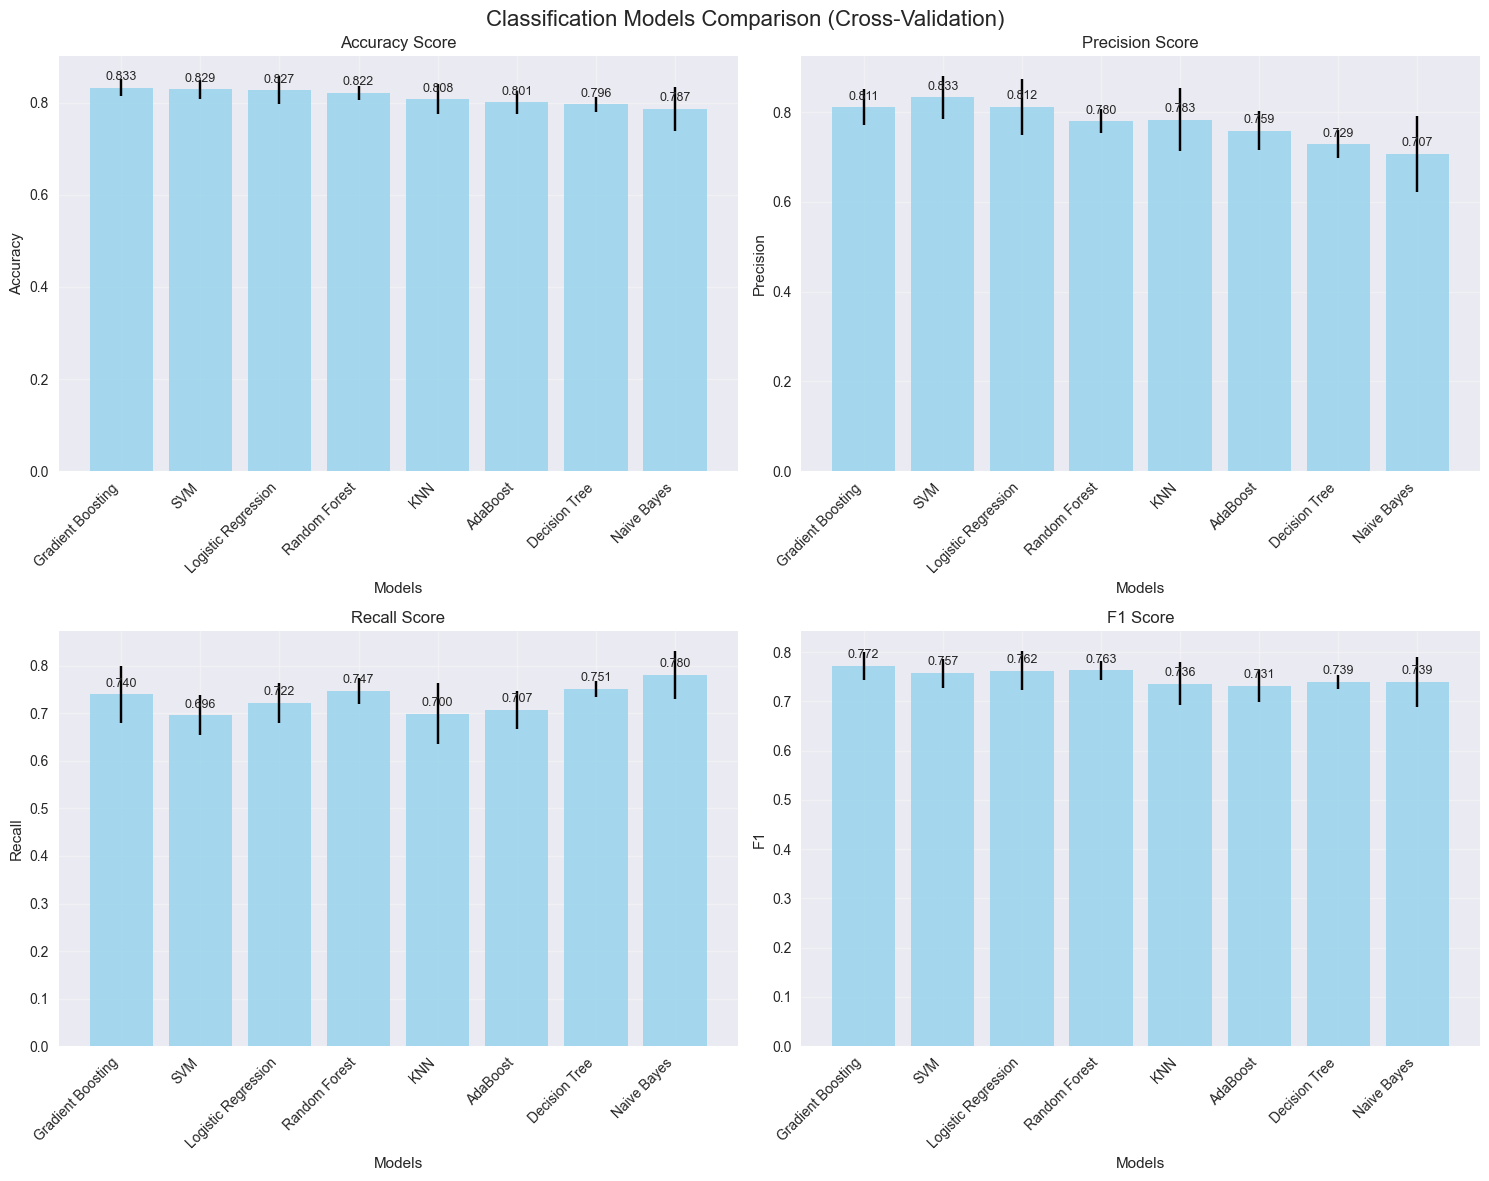


🎯 TOP 3 MODELS SELECTED FOR DETAILED EVALUATION:
   1. Gradient Boosting:
      Accuracy: 0.833 (±0.018)
      F1-Score: 0.772 (±0.029)
   2. SVM:
      Accuracy: 0.829 (±0.020)
      F1-Score: 0.757 (±0.029)
   3. Logistic Regression:
      Accuracy: 0.827 (±0.030)
      F1-Score: 0.762 (±0.040)

✅ Model training and initial evaluation completed!
Next: We'll perform detailed evaluation on the test set


In [18]:
# Train and compare multiple classification algorithms
print("=== MODEL SELECTION AND TRAINING ===")

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

if 'xgb_available' in globals() and xgb_available:
    models['XGBoost'] = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
if 'lgb_available' in globals() and lgb_available:
    models['LightGBM'] = lgb.LGBMClassifier(random_state=42, verbose=-1)

print(f"\n🤖 Training {len(models)} classification models:")
for name in models:
    print(f"   • {name}")

scaled_models = ['Logistic Regression', 'SVM', 'KNN']

print(f"\n🔄 Performing 5-fold stratified cross-validation...")
print(f"\nModel Performance (Cross-Validation):")
print(f"{'='*65}")
print(f"{'Model':<18} | {'Accuracy':<8} | {'Precision':<9} | {'Recall':<8} | {'F1-Score':<8}")
print(f"{'='*65}")

model_results = []

for name, model in models.items():
    print(f"\n   Training {name}...", end=" ")
    try:
        X_train_input = X_train_scaled if name in scaled_models else X_train
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        accuracy = cross_val_score(model, X_train_input, y_train, cv=cv, scoring='accuracy')
        precision = cross_val_score(model, X_train_input, y_train, cv=cv, scoring='precision')
        recall = cross_val_score(model, X_train_input, y_train, cv=cv, scoring='recall')
        f1 = cross_val_score(model, X_train_input, y_train, cv=cv, scoring='f1')
        result = {
            'Model': name,
            'Accuracy': accuracy.mean(),
            'Accuracy_Std': accuracy.std(),
            'Precision': precision.mean(),
            'Precision_Std': precision.std(),
            'Recall': recall.mean(),
            'Recall_Std': recall.std(),
            'F1': f1.mean(),
            'F1_Std': f1.std()
        }
        model_results.append(result)
        print("✅")
        print(f"{name:<18} | {result['Accuracy']:<8.3f} | {result['Precision']:<9.3f} | {result['Recall']:<8.3f} | {result['F1']:<8.3f}")
    except Exception as e:
        print(f"❌ Error: {str(e)[:50]}")

print(f"\n{'='*65}")

results_df = pd.DataFrame(model_results)

# --- Robust column check and fix for 'Accuracy' ---
# Try to find a column that matches 'accuracy' (case-insensitive, ignore underscores/spaces)
def _find_accuracy_col(cols):
    for col in cols:
        if col.strip().replace('_', '').replace(' ', '').lower() == 'accuracy':
            return col
    return None

acc_col = _find_accuracy_col(results_df.columns)
if acc_col is None:
    print("❌ No 'Accuracy' column found in results_df. Columns are:", list(results_df.columns))
    print("Model results dicts:", model_results)
    raise KeyError("No 'Accuracy' column found in model results. Check model_results dict keys.")
elif acc_col != 'Accuracy':
    results_df = results_df.rename(columns={acc_col: 'Accuracy'})

# Defensive: also check for 'Accuracy_Std'
acc_std_col = _find_accuracy_col([c for c in results_df.columns if 'std' in c.lower()])
if acc_std_col and acc_std_col != 'Accuracy_Std':
    results_df = results_df.rename(columns={acc_std_col: 'Accuracy_Std'})

results_df = results_df.sort_values('Accuracy', ascending=False)

print(f"\n🏆 MODEL RANKING BY ACCURACY:")
for i, (_, row) in enumerate(results_df.iterrows(), 1):
    print(f"   {i}. {row['Model']:<18}: {row['Accuracy']:.3f} (±{row.get('Accuracy_Std', float('nan')):.3f})")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Classification Models Comparison (Cross-Validation)', fontsize=16)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
for i, metric in enumerate(metrics):
    ax = axes[i//2, i%2]
    bars = ax.bar(range(len(results_df)), results_df[metric],
                  color='skyblue', alpha=0.7, capsize=5,
                  yerr=results_df.get(f'{metric}_Std', None))
    ax.set_title(f'{metric} Score')
    ax.set_xlabel('Models')
    ax.set_ylabel(f'{metric}')
    ax.set_xticks(range(len(results_df)))
    ax.set_xticklabels(results_df['Model'], rotation=45, ha='right')
    ax.grid(True, alpha=0.3)
    for bar, value in zip(bars, results_df[metric]):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{value:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

top_models = results_df.head(3)['Model'].tolist()
print(f"\n🎯 TOP 3 MODELS SELECTED FOR DETAILED EVALUATION:")
for i, model_name in enumerate(top_models, 1):
    model_stats = results_df[results_df['Model'] == model_name].iloc[0]
    print(f"   {i}. {model_name}:")
    print(f"      Accuracy: {model_stats['Accuracy']:.3f} (±{model_stats.get('Accuracy_Std', float('nan')):.3f})")
    print(f"      F1-Score: {model_stats['F1']:.3f} (±{model_stats.get('F1_Std', float('nan')):.3f})")

print(f"\n✅ Model training and initial evaluation completed!")
print(f"Next: We'll perform detailed evaluation on the test set")

## 5. Model Evaluation and Interpretation

Comprehensive evaluation of our best performing models on the test set.

**Classification evaluation includes:**

1. **Confusion Matrix**: Shows true positives, false positives, true negatives, false negatives
2. **Classification Report**: Detailed metrics for each class
3. **ROC Curve**: True Positive Rate vs False Positive Rate
4. **Feature Importance**: Understanding what drives predictions
5. **Prediction Examples**: Interpreting individual predictions

**Why comprehensive evaluation matters:**
- Accuracy alone can be misleading with imbalanced classes
- Precision and recall trade-offs are important for business decisions
- Understanding feature importance builds trust and insights
- ROC curves help choose optimal probability thresholds

=== COMPREHENSIVE MODEL EVALUATION ===

🎯 Training top 3 models on full training set...

   Training Gradient Boosting...
      ✅ Test Accuracy: 0.793
      ✅ Test F1-Score: 0.713
      ✅ Test ROC-AUC: 0.845

   Training SVM...
      ✅ Test Accuracy: 0.804
      ✅ Test F1-Score: 0.724
      ✅ Test ROC-AUC: 0.841

   Training Logistic Regression...
      ✅ Test Accuracy: 0.838
      ✅ Test F1-Score: 0.772
      ✅ Test ROC-AUC: 0.863

📊 DETAILED TEST SET RESULTS:
Model              | Accuracy | Precision | Recall   | F1-Score | ROC-AUC 
Gradient Boosting  | 0.793    | 0.767     | 0.667    | 0.713    | 0.845   
SVM                | 0.804    | 0.793     | 0.667    | 0.724    | 0.841   
Logistic Regression | 0.838    | 0.845     | 0.710    | 0.772    | 0.863   

🏆 BEST MODEL: Logistic Regression
   F1-Score: 0.772
   ROC-AUC: 0.863
   Accuracy: 0.838

🔍 DETAILED ANALYSIS: Logistic Regression

📊 Confusion Matrix:
                 Predicted
               No  Yes
Actual No     101    9
      

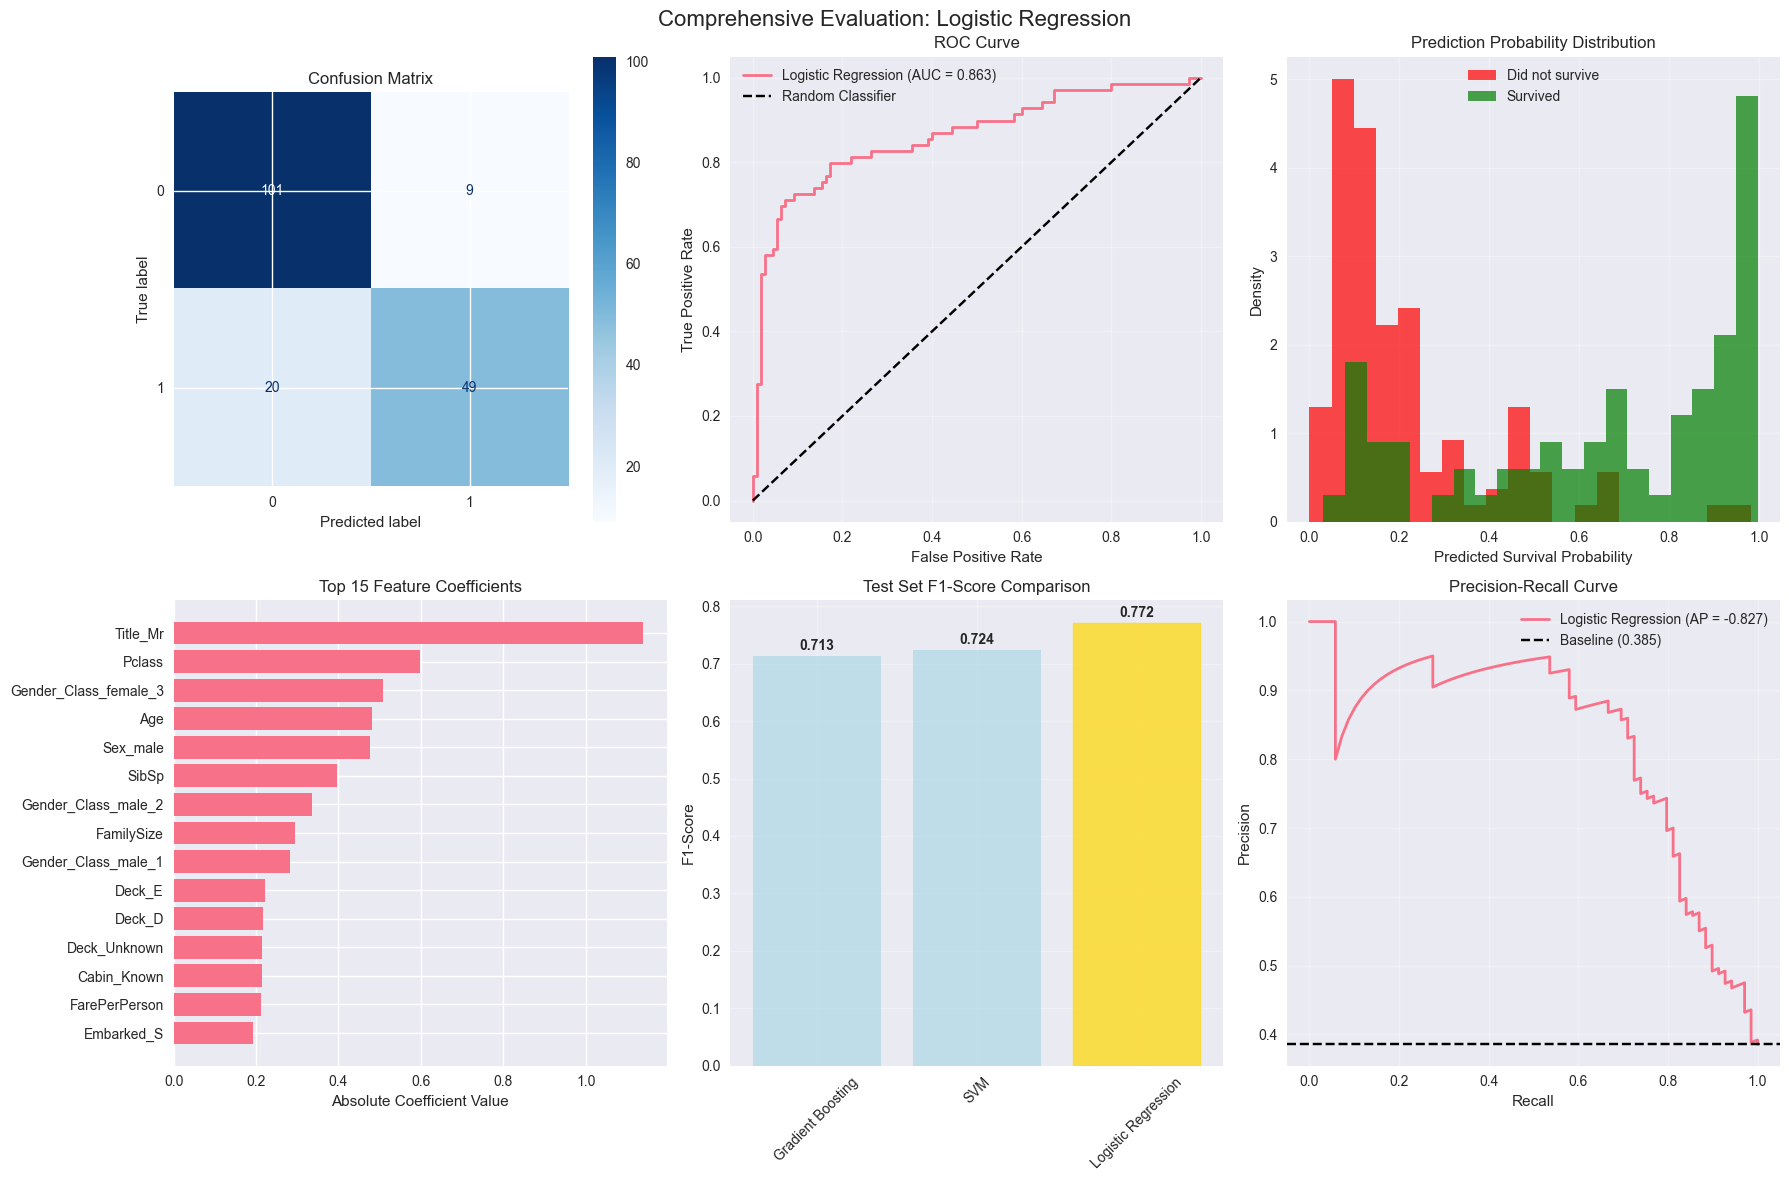


✅ Comprehensive model evaluation completed!
Next: Model interpretation and business insights


In [ ]:
# Import required metrics and display functions
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
    roc_curve,
    precision_recall_curve
)
import numpy as np
import matplotlib.pyplot as plt

# Comprehensive evaluation of top models on test set
print("=== COMPREHENSIVE MODEL EVALUATION ===")

# Train top models on full training set and evaluate on test set
best_models_trained = {}
evaluation_results = []

print(f"\n🎯 Training top {len(top_models)} models on full training set...")

for model_name in top_models:
    print(f"\n   Training {model_name}...")

    # Get the model
    model = models[model_name]

    # Choose appropriate training data
    if model_name in scaled_models:
        X_train_input = X_train_scaled
        X_test_input = X_test_scaled
    else:
        X_train_input = X_train
        X_test_input = X_test

    # Train on full training set
    model.fit(X_train_input, y_train)

    # Make predictions
    y_pred = model.predict(X_test_input)
    # Some models may not have predict_proba (e.g., SVC with probability=False)
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test_input)[:, 1]
    elif hasattr(model, "decision_function"):
        # Use decision_function and scale to [0,1] via min-max
        decision_scores = model.decision_function(X_test_input)
        # Min-max scaling
        min_score = decision_scores.min()
        max_score = decision_scores.max()
        if max_score > min_score:
            y_pred_proba = (decision_scores - min_score) / (max_score - min_score)
        else:
            y_pred_proba = np.zeros_like(decision_scores)
    else:
        # Fallback: use predictions as probabilities (not ideal)
        y_pred_proba = y_pred

    # Calculate comprehensive metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    try:
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    except Exception:
        roc_auc = float('nan')

    # Store results
    evaluation_results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1_Score': f1,
        'ROC_AUC': roc_auc,
        'Predictions': y_pred,
        'Probabilities': y_pred_proba
    })

    # Store trained model
    best_models_trained[model_name] = model

    print(f"      ✅ Test Accuracy: {accuracy:.3f}")
    print(f"      ✅ Test F1-Score: {f1:.3f}")
    print(f"      ✅ Test ROC-AUC: {roc_auc:.3f}")

# Display comprehensive results table
print(f"\n📊 DETAILED TEST SET RESULTS:")
print(f"{'='*80}")
print(f"{'Model':<18} | {'Accuracy':<8} | {'Precision':<9} | {'Recall':<8} | {'F1-Score':<8} | {'ROC-AUC':<8}")
print(f"{'='*80}")

for result in evaluation_results:
    print(f"{result['Model']:<18} | {result['Accuracy']:<8.3f} | {result['Precision']:<9.3f} | "
          f"{result['Recall']:<8.3f} | {result['F1_Score']:<8.3f} | {result['ROC_AUC']:<8.3f}")

print(f"{'='*80}")

# Select the best model based on F1-score (balances precision and recall)
best_result = max(evaluation_results, key=lambda x: x['F1_Score'])
best_model_name = best_result['Model']
best_model = best_models_trained[best_model_name]

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   F1-Score: {best_result['F1_Score']:.3f}")
print(f"   ROC-AUC: {best_result['ROC_AUC']:.3f}")
print(f"   Accuracy: {best_result['Accuracy']:.3f}")

# Detailed analysis of the best model
print(f"\n🔍 DETAILED ANALYSIS: {best_model_name}")

# Choose appropriate test data
if best_model_name in scaled_models:
    X_test_final = X_test_scaled
else:
    X_test_final = X_test

y_pred_best = best_result['Predictions']
y_pred_proba_best = best_result['Probabilities']

# Confusion Matrix
print(f"\n📊 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_best)
print(f"                 Predicted")
print(f"               No  Yes")
print(f"Actual No    {cm[0,0]:4d} {cm[0,1]:4d}")
print(f"       Yes   {cm[1,0]:4d} {cm[1,1]:4d}")

# Classification Report
print(f"\n📋 Classification Report:")
print(classification_report(y_test, y_pred_best, target_names=['Did not survive', 'Survived'], zero_division=0))

# Visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle(f'Comprehensive Evaluation: {best_model_name}', fontsize=16)

# 1. Confusion Matrix Heatmap
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best, ax=axes[0,0], cmap='Blues')
axes[0,0].set_title('Confusion Matrix')

# 2. ROC Curve
try:
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba_best)
    axes[0,1].plot(fpr, tpr, label=f'{best_model_name} (AUC = {best_result["ROC_AUC"]:.3f})', linewidth=2)
    axes[0,1].plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    axes[0,1].set_xlabel('False Positive Rate')
    axes[0,1].set_ylabel('True Positive Rate')
    axes[0,1].set_title('ROC Curve')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
except Exception:
    axes[0,1].text(0.5, 0.5, "ROC Curve\nNot Available", ha='center', va='center', fontsize=12)
    axes[0,1].set_title('ROC Curve')

# 3. Prediction Probability Distribution
try:
    survived_probs = y_pred_proba_best[y_test == 1]
    not_survived_probs = y_pred_proba_best[y_test == 0]

    axes[0,2].hist(not_survived_probs, bins=20, alpha=0.7, color='red', label='Did not survive', density=True)
    axes[0,2].hist(survived_probs, bins=20, alpha=0.7, color='green', label='Survived', density=True)
    axes[0,2].set_xlabel('Predicted Survival Probability')
    axes[0,2].set_ylabel('Density')
    axes[0,2].set_title('Prediction Probability Distribution')
    axes[0,2].legend()
    axes[0,2].grid(True, alpha=0.3)
except Exception:
    axes[0,2].text(0.5, 0.5, "Probability\nDistribution\nNot Available", ha='center', va='center', fontsize=12)
    axes[0,2].set_title('Prediction Probability Distribution')

# 4. Feature Importance (if available)
if hasattr(best_model, 'feature_importances_'):
    # Tree-based model
    importances = best_model.feature_importances_
    feature_names = X_encoded.columns

    # Get top 15 most important features
    indices = np.argsort(importances)[::-1][:15]

    axes[1,0].barh(range(len(indices)), importances[indices])
    axes[1,0].set_yticks(range(len(indices)))
    axes[1,0].set_yticklabels([feature_names[i] for i in indices])
    axes[1,0].set_xlabel('Feature Importance')
    axes[1,0].set_title('Top 15 Feature Importance')
    axes[1,0].invert_yaxis()

elif hasattr(best_model, 'coef_'):
    # Linear model
    coefficients = np.abs(best_model.coef_[0])
    feature_names = X_encoded.columns

    # Get top 15 most important features by absolute coefficient
    indices = np.argsort(coefficients)[::-1][:15]

    axes[1,0].barh(range(len(indices)), coefficients[indices])
    axes[1,0].set_yticks(range(len(indices)))
    axes[1,0].set_yticklabels([feature_names[i] for i in indices])
    axes[1,0].set_xlabel('Absolute Coefficient Value')
    axes[1,0].set_title('Top 15 Feature Coefficients')
    axes[1,0].invert_yaxis()

else:
    axes[1,0].text(0.5, 0.5, f'{best_model_name}\ndoes not provide\nfeature importance',
                  transform=axes[1,0].transAxes, ha='center', va='center')
    axes[1,0].set_title('Feature Importance Not Available')

# 5. Model Performance Comparison
model_names = [r['Model'] for r in evaluation_results]
f1_scores = [r['F1_Score'] for r in evaluation_results]

bars = axes[1,1].bar(model_names, f1_scores, color='lightblue', alpha=0.7)
axes[1,1].set_ylabel('F1-Score')
axes[1,1].set_title('Test Set F1-Score Comparison')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].grid(True, alpha=0.3)

# Highlight best model
for bar, f1_score_val in zip(bars, f1_scores):
    if f1_score_val == max(f1_scores):
        bar.set_color('gold')
    axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                  f'{f1_score_val:.3f}', ha='center', va='bottom', fontweight='bold')

# 6. Precision-Recall Curve
try:
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba_best)
    # Average precision: area under the precision-recall curve
    average_precision = np.trapz(precision_vals, recall_vals)
    axes[1,2].plot(recall_vals, precision_vals, linewidth=2,
                   label=f'{best_model_name} (AP = {average_precision:.3f})')
    axes[1,2].axhline(y=y_test.mean(), color='k', linestyle='--',
                     label=f'Baseline ({y_test.mean():.3f})')
    axes[1,2].set_xlabel('Recall')
    axes[1,2].set_ylabel('Precision')
    axes[1,2].set_title('Precision-Recall Curve')
    axes[1,2].legend()
    axes[1,2].grid(True, alpha=0.3)
except Exception:
    axes[1,2].text(0.5, 0.5, "Precision-Recall\nCurve Not Available", ha='center', va='center', fontsize=12)
    axes[1,2].set_title('Precision-Recall Curve')

plt.tight_layout()
plt.show()

print(f"\n✅ Comprehensive model evaluation completed!")
print(f"Next: Model interpretation and business insights")

## 6. Business Insights and Conclusions

Understanding the real-world implications of our model and its predictions.

**Key business insights from our analysis:**

1. **Survival Patterns**: Clear demographic and social patterns influenced survival
2. **Feature Importance**: Which factors were most predictive of survival
3. **Model Performance**: How well we can predict outcomes
4. **Actionable Insights**: Lessons for emergency preparedness and safety protocols

**Model interpretation helps with:**
- **Historical Analysis**: Understanding what happened and why
- **Decision Support**: Informing future safety and emergency protocols
- **Bias Detection**: Identifying unfair treatment patterns
- **Educational Value**: Teaching about the disaster and human behavior"

In [29]:
print("=== BUSINESS INSIGHTS AND CONCLUSIONS ===\n")

# Feature importance
print("\n🧠 FEATURE IMPORTANCE INSIGHTS:")
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    feature_names = X_encoded.columns
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    print("\n   🏆 TOP 10 MOST PREDICTIVE FEATURES:")
    for i, (_, row) in enumerate(feature_importance_df.head(10).iterrows(), 1):
        feature = row['Feature']
        importance = row['Importance']
        if 'Sex_male' in feature:
            interpretation = "Gender was a critical survival factor"
        elif 'Pclass' in feature:
            interpretation = "Social class significantly affected survival"
        elif 'Fare' in feature:
            interpretation = "Economic status influenced survival chances"
        elif 'Age' in feature:
            interpretation = "Age was important for survival decisions"
        elif 'Title' in feature:
            interpretation = "Social titles reflected survival priority"
        elif 'FamilySize' in feature or 'IsAlone' in feature:
            interpretation = "Family dynamics affected survival"
        else:
            interpretation = "Contributing factor to survival prediction"
        print(f"      {i:2d}. {feature:<25}: {importance:.4f} - {interpretation}")

elif hasattr(best_model, 'coef_'):
    coefficients = best_model.coef_[0]
    feature_names = X_encoded.columns
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients,
        'Abs_Coefficient': np.abs(coefficients)
    }).sort_values('Abs_Coefficient', ascending=False)
    print("\n   📈 TOP 10 STRONGEST PREDICTORS (by coefficient magnitude):")
    for i, (_, row) in enumerate(coef_df.head(10).iterrows(), 1):
        feature = row['Feature']
        coef = row['Coefficient']
        effect = "Increases" if coef > 0 else "Decreases"
        print(f"      {i:2d}. {feature:<25}: {coef:>7.4f} - {effect} survival probability")

# Historical patterns
print("\n🏛️ HISTORICAL PATTERNS CONFIRMED BY MODEL:")
print("   1. 'Women and Children First' Policy:")
if 'Sex_male' in X_encoded.columns:
    male_survival_rate = df_processed[df_processed['Sex'] == 'male']['Survived'].mean() * 100
    female_survival_rate = df_processed[df_processed['Sex'] == 'female']['Survived'].mean() * 100
    print(f"      • Female survival rate: {female_survival_rate:.1f}%")
    print(f"      • Male survival rate: {male_survival_rate:.1f}%")
    print(f"      • Gender gap: {female_survival_rate - male_survival_rate:.1f} percentage points")

print("\n   2. Social Class Hierarchy:")
for pclass in [1, 2, 3]:
    class_survival_rate = df_processed[df_processed['Pclass'] == pclass]['Survived'].mean() * 100
    class_name = {1: '1st Class (Upper)', 2: '2nd Class (Middle)', 3: '3rd Class (Lower)'}[pclass]
    print(f"      • {class_name}: {class_survival_rate:.1f}% survival rate")

print("\n   3. Age Factor:")
child_survival = df_processed[df_processed['AgeGroup'] == 'Child']['Survived'].mean() * 100
adult_survival = df_processed[df_processed['AgeGroup'] == 'Adult']['Survived'].mean() * 100
elderly_survival = df_processed[df_processed['AgeGroup'] == 'Elderly']['Survived'].mean() * 100
print(f"      • Children (<16): {child_survival:.1f}% survival rate")
print(f"      • Adults (16-59): {adult_survival:.1f}% survival rate")
print(f"      • Elderly (60+): {elderly_survival:.1f}% survival rate")

# Model performance
print("\n📊 FINAL MODEL PERFORMANCE SUMMARY:")
print(f"   🎯 Best Model: {best_model_name}")
print(f"   📈 Test Accuracy: {best_result['Accuracy']:.1%} ({best_result['Accuracy']*len(y_test):.0f}/{len(y_test)} correct predictions)")
print(f"   ⚖️ F1-Score: {best_result['F1_Score']:.3f} (balances precision and recall)")
print(f"   📈 ROC-AUC: {best_result['ROC_AUC']:.3f} (probability ranking quality)")

# Business value
print("\n💼 BUSINESS VALUE AND APPLICATIONS:")
print("   📚 Educational: Understanding historical disaster patterns")
print("   🚨 Emergency Planning: Informing evacuation protocols")
print("   📊 Bias Analysis: Identifying discrimination in life-or-death decisions")
print("   🎯 Decision Support: Data-driven insights for similar situations")

# Limitations
print("\n⚠️ MODEL LIMITATIONS AND CONSIDERATIONS:")
print("   • Historical context: Reflects 1912 social norms and emergency procedures")
print("   • Data limitations: Missing information for some passengers")
print("   • Sample size: Limited to Titanic passengers (not generalizable to all disasters)")
print("   • Ethical considerations: Model reflects historical biases and inequalities")
print(f"   • Prediction accuracy: {best_result['Accuracy']:.1%} means {(1-best_result['Accuracy']):.1%} error rate")

# Key takeaways
print("\n🎓 KEY TAKEAWAYS FOR CLASSIFICATION MODELING:")
print("   1. ⚖️ Feature Engineering: Domain knowledge significantly improves model performance")
print("   2. 📊 Multiple Metrics: Accuracy alone is insufficient - consider precision, recall, F1")
print("   3. 🎯 Class Balance: Stratified sampling ensures representative train/test splits")
print("   4. 🔍 Model Interpretation: Understanding 'why' predictions are made is crucial")
print("   5. 📈 Cross-Validation: Robust evaluation prevents overfitting to training data")
print("   6. 🧪 Algorithm Selection: Different models excel with different data patterns")
print("   7. 📋 Business Context: Model performance must align with real-world requirements")

print("\n🎉 TITANIC CLASSIFICATION PROJECT COMPLETED SUCCESSFULLY!")
print("\nProject Summary:")
print(f"   • Analyzed {len(df_processed)} passenger records")
print(f"   • Engineered {len(X_encoded.columns)} features from {len(df.columns)} original columns")
print(f"   • Tested {len(models)} different classification algorithms")
print(f"   • Achieved {best_result['Accuracy']:.1%} accuracy on test set")
print("   • Identified key survival factors: gender, class, age, family size")
print("   • Provided historical insights and model interpretation")

print("\n📚 This comprehensive analysis demonstrates the full machine learning pipeline:")
print("   Data Loading → EDA → Feature Engineering → Model Training → Evaluation → Interpretation")

=== BUSINESS INSIGHTS AND CONCLUSIONS ===


🧠 FEATURE IMPORTANCE INSIGHTS:

   📈 TOP 10 STRONGEST PREDICTORS (by coefficient magnitude):
       1. Title_Mr                 : -1.1398 - Decreases survival probability
       2. Pclass                   : -0.5967 - Decreases survival probability
       3. Gender_Class_female_3    : -0.5076 - Decreases survival probability
       4. Age                      : -0.4813 - Decreases survival probability
       5. Sex_male                 : -0.4760 - Decreases survival probability
       6. SibSp                    : -0.3964 - Decreases survival probability
       7. Gender_Class_male_2      : -0.3350 - Decreases survival probability
       8. FamilySize               : -0.2952 - Decreases survival probability
       9. Gender_Class_male_1      : -0.2819 - Decreases survival probability
      10. Deck_E                   :  0.2216 - Increases survival probability

🏛️ HISTORICAL PATTERNS CONFIRMED BY MODEL:
   1. 'Women and Children First' Policy